# Tree-based ML and Feature Selection

**This week, your assignment is:**

- use our prepared churn data from week 2
- break our data into features and targets, and train and test sets
- use sklearn to fit a decision tree to the training data
    - plot the decision tree
    - change the max_depth of the decision tree to improve the model if needed (or tune it with a hyperparameter search)
- plot the correlations between features and targets
- use sklearn to fit a random forest model to predict churn from our dataset
    - plot the feature importances from the random forest
- choose some of the less-important features to remove from the model using feature importances and correlations and fit the random forest model to the new data
    - examine the feature importances after removing less important features
- write a short analysis of the results of your work


***Optional* advanced tasks:**
- use H2O to fit a random forest to our original, unmodified data (missing values and all)
    - you can decide if you want to break the data into train and test sets or not, but remember it's best to evaluate performance on a test or validation dataset
    - plot the H2O random forest's feature importances
- tune the random forest hyperparameters for the sklearn and/or H2O models
- use forward and/or backward selection with feature importances from a random forest model
- use recursive feature selection
- compare the various feature selection methods you tried and write a short summary

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

In [9]:
# Data Frame with numeric data from assignment2
df = pd.read_csv('~/Documents/MSDS_VaishaliWork/MSDS600_DataScience/Week2/Assignment2/updated_churn_data.csv')
df

,Unnamed: 0,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,0,29.85,29.85,0
1,1,34,1,1,1,56.95,1889.50,0
2,2,2,1,0,1,53.85,108.15,1
3,3,45,0,1,2,42.30,1840.75,0
4,4,2,1,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...
7027,7038,24,1,1,1,84.80,1990.50,0
7028,7039,72,1,1,3,103.20,7362.90,0
7029,7040,11,0,0,0,29.60,346.45,0
7030,7041,4,1,0,1,74.40,306.60,1


In [82]:
# We got an extra unnamed column so removing it from the data frame.
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7032 non-null   int64  
 1   PhoneService    7032 non-null   int64  
 2   Contract        7032 non-null   int64  
 3   PaymentMethod   7032 non-null   int64  
 4   MonthlyCharges  7032 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7032 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 384.7 KB


# Breaking data into target and features

In [84]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

In [85]:
features.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,29.85,29.85
1,34,1,1,1,56.95,1889.50
2,2,1,0,1,53.85,108.15
3,45,0,1,2,42.30,1840.75
4,2,1,0,0,70.70,151.65


In [86]:
targets.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# Splitting data into test and train data
Taking default 75/25

In [87]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42, shuffle = True)

In [88]:
len(x_train)

5274

In [89]:
len(x_test)

1758

# Plotting a Decision tree for the training data

In [90]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.9945013272658324
0.7189988623435722


The accuracy score on the train set is almost 100% but low on test set that is 72%.Looks like we are overfitting. Checking the depth of the tree

In [91]:
dt.get_depth()

27

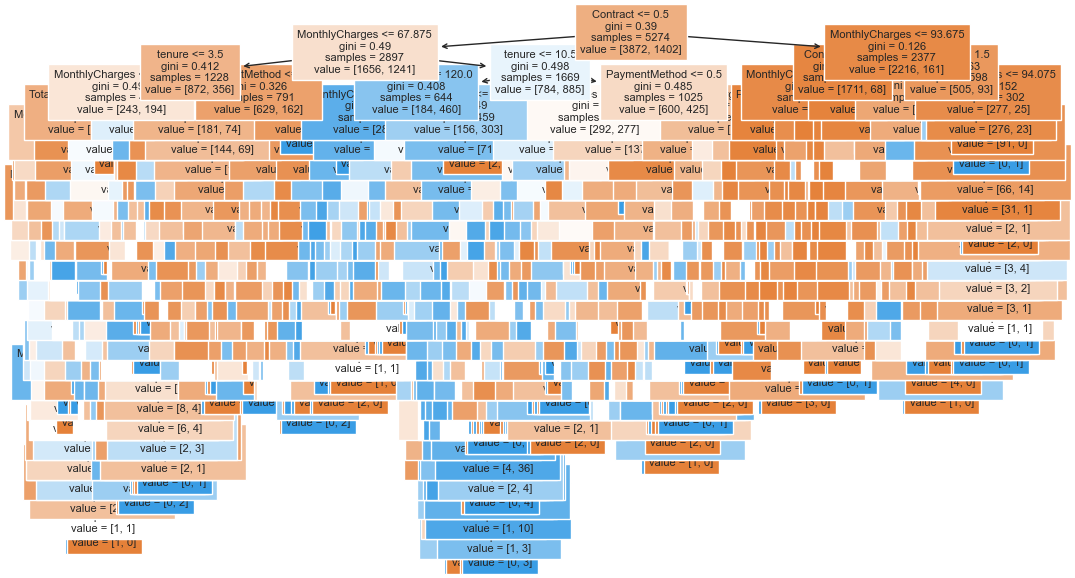

In [26]:
f = plt.figure(figsize=(12, 7))
_ = plot_tree(dt, fontsize=8, feature_names=list(features.columns), filled=True)

# Changing the max depth and tuning the hyperparameters to improve the model
Changing the values of below hyperparameters to plot the decision tree with better view:-
max_features =3
max_leaf_nodes =15
min_samples_leaf =8
min_samples_split =18

In [92]:
dt1 = DecisionTreeClassifier(max_features=3, max_leaf_nodes=15, min_samples_leaf=8, 
                                    min_samples_split=18, random_state=42)
dt1.fit(x_train, y_train)

print(dt1.score(x_train, y_train))
print(dt1.score(x_test, y_test))

0.7933257489571482
0.7889647326507395


The accuracy score is almost same now for train and test data so we are good.

In [93]:
# By tuning the hyperparameters the depth is reduced to 5
dt1.get_depth()

5

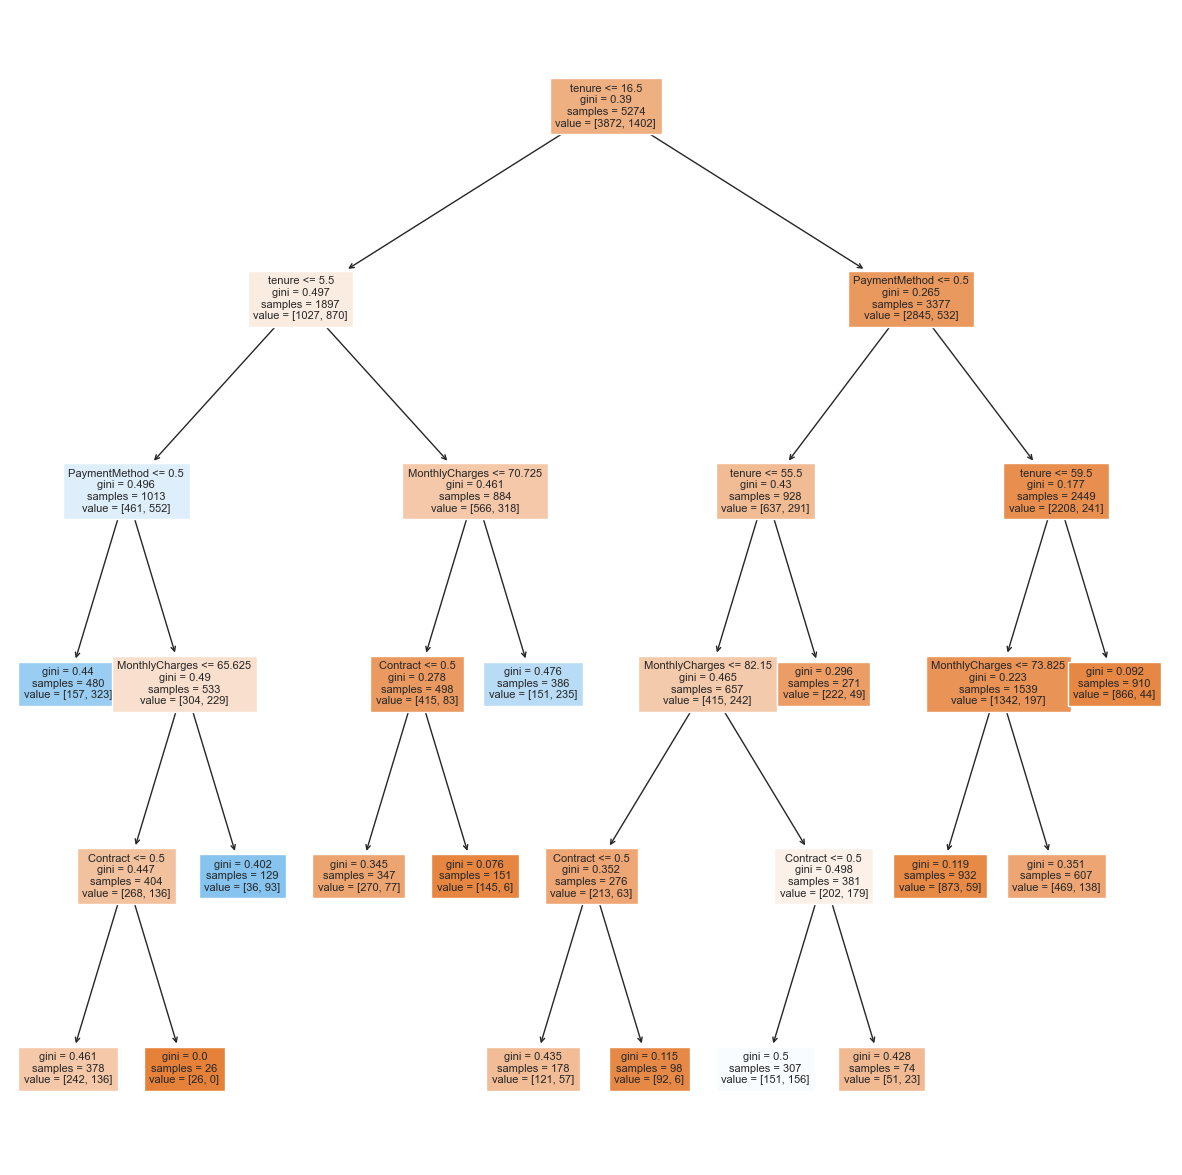

In [94]:
f = plt.figure(figsize=(15, 15))
_ = plot_tree(dt1, fontsize=8, feature_names=list(features.columns), filled=True)

The plot shows us the nodes of the tree - the root node is at the top and leaf nodes are at the bottom. The color is blue for mostly class 1 and orange for mostly class 0. We can see good number of leaf nodes end up with pure samples of one or the other class.
Still we see some data distributed across different colors and is not very specific.

In [95]:
dt = DecisionTreeClassifier(max_depth=2,max_features=2, max_leaf_nodes=15, min_samples_leaf=8, 
                                    min_samples_split=18, random_state=42)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.7529389457717103
0.7565415244596132


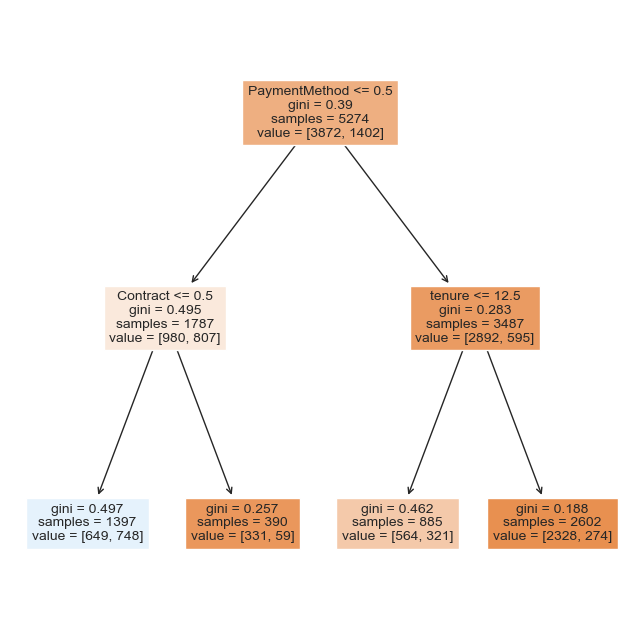

In [96]:
f = plt.figure(figsize=(8, 8))
_ = plot_tree(dt, fontsize=10, feature_names=list(features.columns), filled=True)

Seeing how deep the tree got and the number of samples in the leaf nodes is helpful. We can restrict the number of levels of splits with max_depth. Tried a few values for max depth and see how it changes. Here, we explored max depth as 2 and see results are nearly equal in train/test scores but performance is reduced a lot. So max depth = 3 eliminates overfitting the most.

# Correlations between target and features

<Axes: >

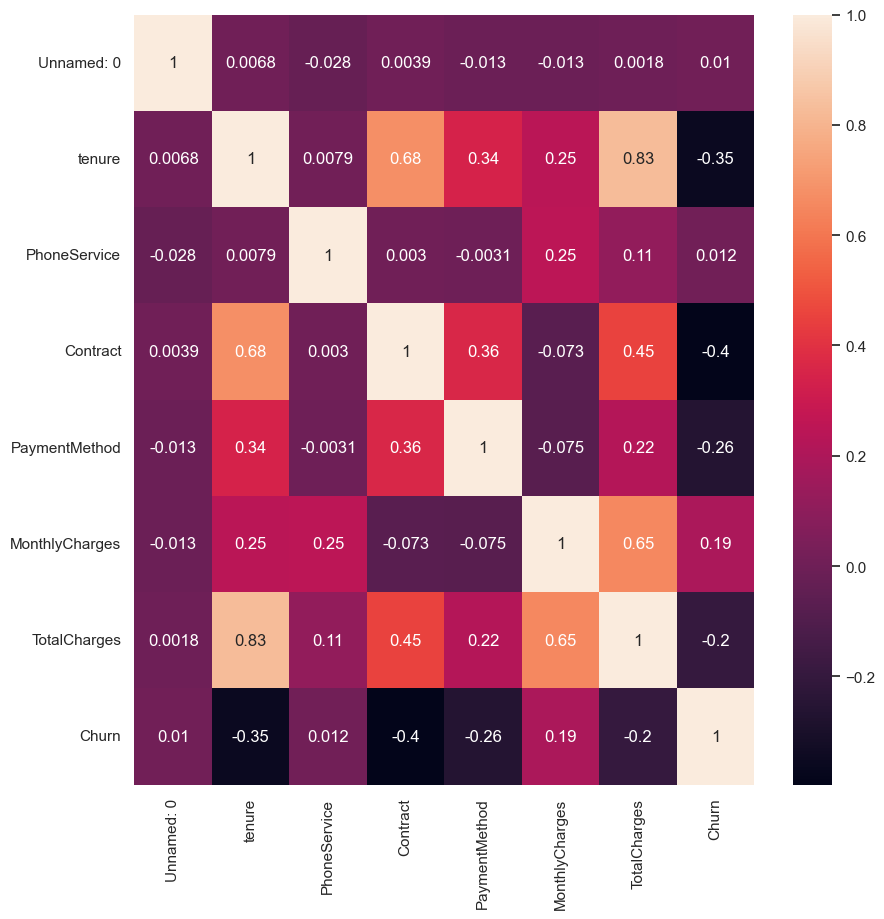

In [66]:
f = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

Looks like Phoneservice is not linearly related to churn rate.

# Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=5, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.8026166097838453
0.78839590443686


RandomForestClassifier gives less variance between train and test data. Exploring max depth as 2 but seems this reduces the accuracy score for churn data.

In [44]:
rfc = RandomForestClassifier(max_depth=2, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.7703830109973455
0.767349260523322


Tuning some other hyperparameters, like max_features. The default for this is the square root of the number of features, which is around 3.

In [97]:
import math

math.sqrt(x_train.shape[1])

2.449489742783178

# Tuning some more hyperparameters for random Forest classifier
max_depth = 3,
max_features calculated was 3 but trying with 4 which looks good.


In [98]:
rfc = RandomForestClassifier(max_depth=3, random_state=42,max_features = 4, max_leaf_nodes=20,min_samples_leaf=1, 
                                    min_samples_split=6,max_samples = 1000)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.7954114524080395
0.7844141069397043


# Feature importances from random Forest

In [64]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


<Axes: title={'center': 'Feature Importance'}>

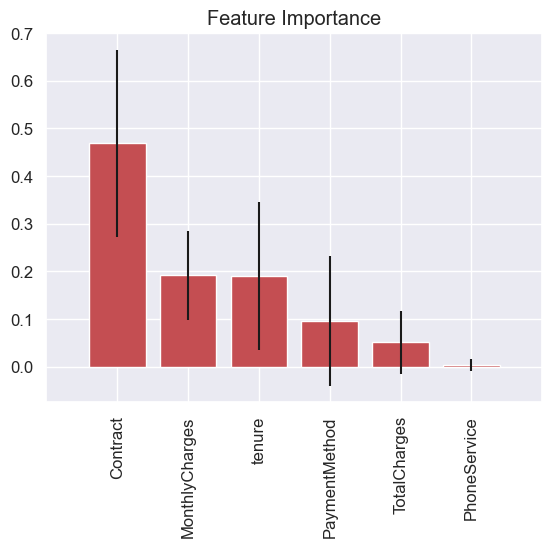

In [99]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(rfc, feature_names=features.columns, x_tick_rotation=90)

We can see here that Contract seems to be the most important variable, followed by tenure, monthly charges and payment method. Phone Service seems to be the less-important feature. We will now remove some of the less-important feature PhoneService and see how that changes performance and the feature importance.

# Removing less important features

In [100]:
new_features = features.drop(['PhoneService'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_features, targets, stratify=targets, random_state=42)

In [101]:
rfc = RandomForestClassifier(max_depth=2, max_features=5, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.782328403488813
0.7753128555176336


The test and train data give the same accuracy score after removing the less important column.

<Axes: title={'center': 'Feature Importance'}>

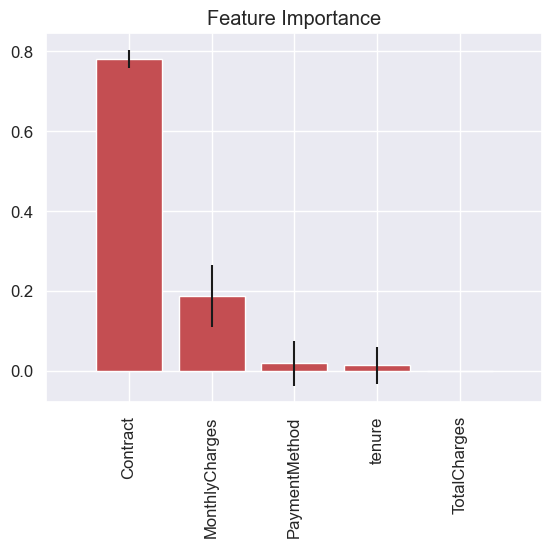

In [102]:
plot_feature_importances(rfc, feature_names=new_features.columns, x_tick_rotation=90)

We observe performance of Random search is almost same as earlier. However, feature importances are changed a lot. Contract is the most important variable for churn rate. Monthly charges and tenure also are important ones to check on the churn rate.

# Summary

In this assignment we explored tree-based ML algorithms. First we plotted decision trees using all the default parameters but it had a depth as 27 so we tuned few of the hyperparameters and reduced the tree depth (levels) to 5 which gave good saccuracy score. Also checked on the model with max depth as 2 and observed performance is almost the same but we got accurate churn 0 and 1 data sets.
Checked on the correlations betwen target and features and saw that PhoneService does not have linear relation with churn rate.
Further explored another model, Random Forest classifier by randomly changing the hyperparameters. The model gave best accuracy with this set of hyperparameters ((max_depth=3, random_state=42,max_features = 4,max_leaf_nodes=20,min_samples_leaf=1, min_samples_split=6,max_samples = 1000)). Also random Forest classifier looks like best algorithm for this data as it gives best accuracy score of more than 80%.
Then checked on feature importances and observed PhoneService was the least important feature to predict the churn, so removing this feature and observation is Contract is the most important feature followed by Monthly payment.

# Optional advanced section- H20

In [77]:
conda install -c conda-forge h2o-py -y

Retrieving notices: ...working... DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/notices.json HTTP/1.1" 404 None
done
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Startin

In [1]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "20.0.2" 2023-07-18; Java(TM) SE Runtime Environment (build 20.0.2+9-78); Java HotSpot(TM) 64-Bit Server VM (build 20.0.2+9-78, mixed mode, sharing)
  Starting server from /Users/puneet/anaconda3/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/px/skdltfh504v5prt3s97v9j240000gn/T/tmpcm1fkjhj
  JVM stdout: /var/folders/px/skdltfh504v5prt3s97v9j240000gn/T/tmpcm1fkjhj/h2o_puneet_started_from_python.out
  JVM stderr: /var/folders/px/skdltfh504v5prt3s97v9j240000gn/T/tmpcm1fkjhj/h2o_puneet_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Denver
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_puneet_d7ukjr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [56]:
hf = h2o.H2OFrame(pd.read_csv('~/documents/MSDS_VaishaliWork/MSDS600_DataScience/Week1_Lab1_Python/Assignment1/churn_data.csv',index_col= 'customerID'))
hf

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,No,Month-to-month,Electronic check,29.85,29.85,No
34,Yes,One year,Mailed check,56.95,1889.5,No
2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
45,No,One year,Bank transfer (automatic),42.3,1840.75,No
2,Yes,Month-to-month,Electronic check,70.7,151.65,Yes
8,Yes,Month-to-month,Electronic check,99.65,820.5,Yes
22,Yes,Month-to-month,Credit card (automatic),89.1,1949.4,No
10,No,Month-to-month,Mailed check,29.75,301.9,No
28,Yes,Month-to-month,Electronic check,104.8,3046.05,Yes
62,Yes,One year,Bank transfer (automatic),56.15,3487.95,No


This includes all the missing values rows and original data.

In [5]:
hf.types

{'tenure': 'int',
 'PhoneService': 'enum',
 'Contract': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

# h2O to fit to a Random Forest

In [57]:
from h2o.estimators import H2ORandomForestEstimator

predictors = hf.columns
predictors.remove('Churn')
response = 'Churn'

# Split the dataset into a train and valid set:
train, valid = hf.split_frame(ratios=[.8], seed=1234, )

# Build and train the model:
drf = H2ORandomForestEstimator(ntrees=50,
                                    max_depth=2,
                                    calibrate_model=True,
                                    calibration_frame=valid)
drf.train(x=predictors,
           y=response,
           training_frame=train,
           validation_frame=valid)

# Eval performance:
perf = drf.model_performance(valid=valid)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Accessing the performance metrics

In [58]:
perf

ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.1502747068739697
RMSE: 0.3876528174461908
LogLoss: 0.4606338143638901
Mean Per-Class Error: 0.2521920735919127
AUC: 0.8235993618133601
AUCPR: 0.6133803161671622
Gini: 0.6471987236267203

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31859628975391385
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     773   244    0.2399   (244.0/1017.0)
Yes    96    267    0.2645   (96.0/363.0)
Total  869   511    0.2464   (340.0/1380.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.318596     0.610984  102
max f2                       0.202527     0.747704  196
max f0point5                 0.418124     0.585909  45
max accuracy                 0.423812     0.787681  39
max precision                0.57399      0.939394  1
max recall                   0.0905702    1         310
max specificity              0.577389     0.998033  0
max absolute_mcc             0.334614     0.452381  93
max min_per_class_accuracy   0.314232     0.741047  108
max mean_per_class_accuracy  0.25747      0.753058  144
max tns                      0.577389     1015      0
max fns                      0.577389     339       0
max fps                      0.077688     1017      326
max tps                      0.0905702    363       310
max tnr                      0.577389     0.998033  0
max fnr                      0.577389     0.933884  0
max fpr                      0.077688     1         326
max tpr                      0.0905702    1         310

Gains/Lift Table: Avg response rate: 26.30 %, avg score: 26.88 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0188406                   0.577389           3.50922   3.50922            0.923077         0.577389   0.923077                    0.577389            0.0661157       0.0661157                  250.922   250.922            0.0641491
2        0.023913                    0.57399            3.80165   3.57125            1                0.57399    0.939394                    0.576668            0.0192837       0.0853994                  280.165   257.125            0.0834329
3        0.0318841                   0.569377           2.41923   3.28325            0.636364         0.569377   0.863636                    0.574845            0.0192837       0.104683                   141.923   228.325            0.0987835
4        0.0405797                   0.542229           2.85124   3.19067            0.75             0.545592   0.839286                    0.568576            0.0247934       0.129477                   185.124   219.067            0.120627
5        0.0992754                   0.538575           2.2059    2.60843            0.580247         0.5387     0.686131                    0.550912            0.129477        0.258953                   120.59    160.843            0.216672
6        0.1                         0.535009           3.80165   2.61708            1                0.537935   0.688406                    0.550818            0.00275482      0.261708                   280.165   161.708            0.219427
7        0.15                        0.433919           2.25895   2.4977             0.594203         0.476866   0.657005                    0.526167            0.112948        0.374656                   125.895   149.77             0.304842
8        0.213768     

# Plotting the variable (feature) importance with H20

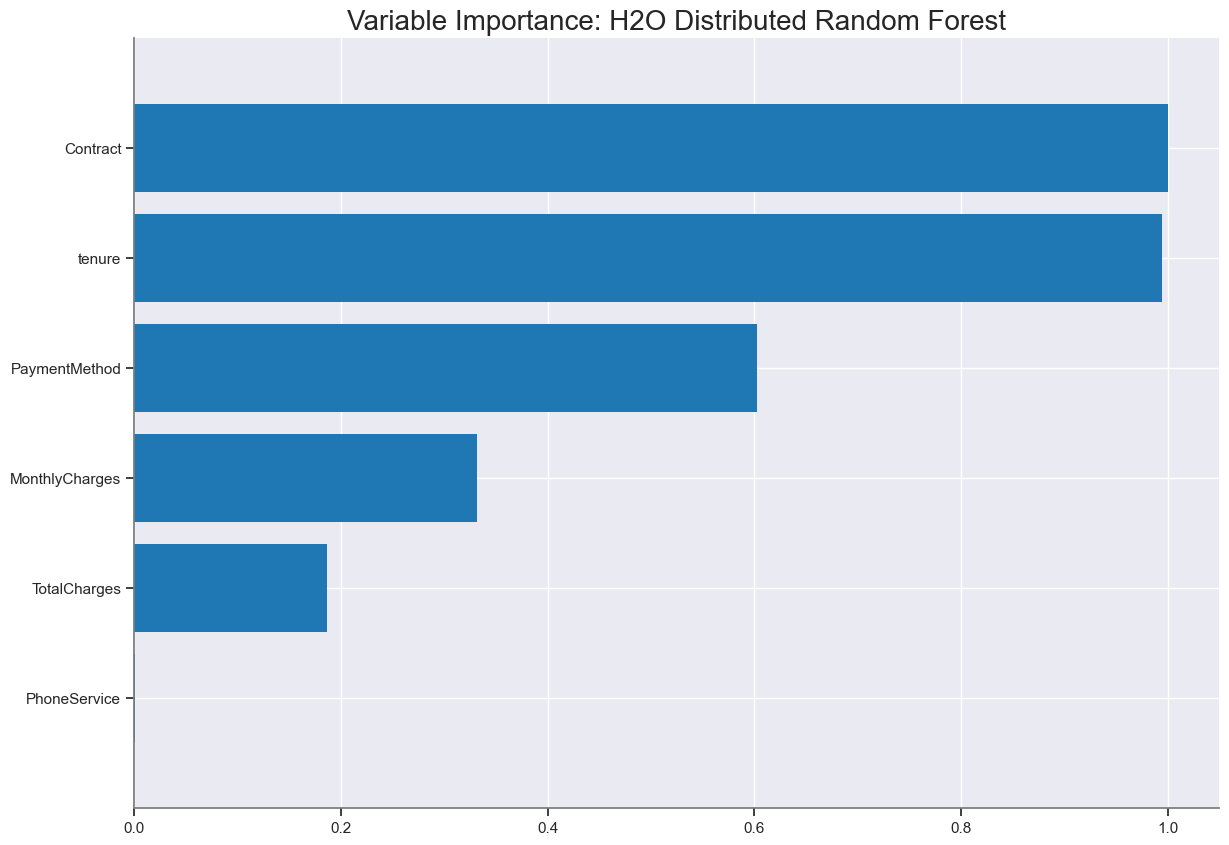

<Figure size 640x480 with 0 Axes>

In [59]:
drf.varimp_plot(num_of_features=features.shape[1])

# Tuning hyperparameters of H2ORandomForestEstimator

Keeping preditors as all the columns (except Churn)from the dataframe and response as Churn.

In [60]:
from h2o.estimators import H2ORandomForestEstimator

predictors = hf.columns
predictors.remove('Churn')
response = 'Churn'

# Split the dataset into a train and valid set:
train, valid = hf.split_frame(seed=1)


# Build and train the model:
drf = H2ORandomForestEstimator(ntrees=100,
                                    max_depth=2,
                                    calibrate_model=True,
                                    calibration_frame=train)
drf.train(x=predictors,
           y=response,
           training_frame=train,
           validation_frame=valid)

# Eval performance:
perf = drf.model_performance(train=train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [61]:
perf

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.14917907177380058
RMSE: 0.3862370668045735
LogLoss: 0.4556930540463106
Mean Per-Class Error: 0.25357557878034
AUC: 0.8254514036870287
AUCPR: 0.6125528190027705
Gini: 0.6509028073740575

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3611274289254157
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     3076  810    0.2084   (810.0/3886.0)
Yes    417   979    0.2987   (417.0/1396.0)
Total  3493  1789   0.2323   (1227.0/5282.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.361127     0.614757  162
max f2                       0.170377     0.736884  287
max f0point5                 0.438242     0.591891  93
max accuracy                 0.439435     0.789474  92
max precision                0.579894     1         0
max recall                   0.0648356    1         392
max specificity              0.579894     1         0
max absolute_mcc             0.361127     0.459202  162
max min_per_class_accuracy   0.343964     0.745754  178
max mean_per_class_accuracy  0.346294     0.7481    176
max tns                      0.579894     3886      0
max fns                      0.579894     1394      0
max fps                      0.0551335    3886      399
max tps                      0.0648356    1396      392
max tnr                      0.579894     1         0
max fnr                      0.579894     0.998567  0
max fpr                      0.0551335    1         399
max tpr                      0.0648356    1         392

Gains/Lift Table: Avg response rate: 26.43 %, avg score: 26.49 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100341                   0.56672            3.21255    3.21255            0.849057         0.571236   0.849057                    0.571236            0.032235        0.032235                   221.255   221.255            0.0301763
2        0.0200682                   0.558201           2.8556     3.03407            0.754717         0.561715   0.801887                    0.566475            0.0286533       0.0608883                  185.56    203.407            0.0554842
3        0.0301022                   0.552393           2.78421    2.95078            0.735849         0.555531   0.779874                    0.562827            0.027937        0.0888252                  178.421   195.078            0.0798185
4        0.0401363                   0.545773           2.64143    2.87345            0.698113         0.549101   0.759434                    0.559396            0.0265043       0.11533                    164.143   187.345            0.102205
5        0.0501704                   0.532866           2.8556     2.86988            0.754717         0.539828   0.758491                    0.555482            0.0286533       0.143983                   185.56    186.988            0.127513
6        0.100151                    0.493465           2.53678    2.70364            0.670455         0.508556   0.714556                    0.532063            0.126791        0.270774                   153.678   170.364            0.231916
7        0.150133                    0.453084           2.19281    2.53358            0.579545         0.475529   0.669609                    0.513242            0.109599        0.380372                   119.281   153.358            0.312951
8        0.2001

The performance is almost the same even after tuning seed and other parameters.

# Forward selection using random forests

The forward variable selection sequentially adds variables such that the predictive loss is minimized. We have only removed PhoneService column and observed the accuracy is almost same.

# Trying backward / recursive selection

Removing another less important element that is total charges

In [70]:
new_features1 = new_features.drop(['TotalCharges'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_features1, targets, stratify=targets, random_state=42)

In [71]:
rfc = RandomForestClassifier(max_depth=2, max_features=7, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.782328403488813
0.7753128555176336


<Axes: title={'center': 'Feature Importance'}>

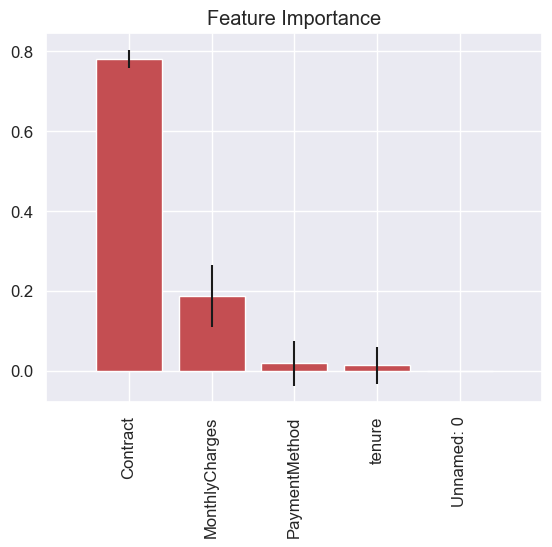

In [72]:
plot_feature_importances(rfc, feature_names=new_features1.columns, x_tick_rotation=90)

The Contract still remains the most important feature for churn followed by Monthly charges. Still the accuracy is amlost same so trying further by reducing another feature.

In [74]:
new_features2 = new_features1.drop(['tenure'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_features2, targets, stratify=targets, random_state=42)

In [75]:
rfc = RandomForestClassifier(max_depth=2, max_features=7, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.754455821008722
0.7434584755403868


<Axes: title={'center': 'Feature Importance'}>

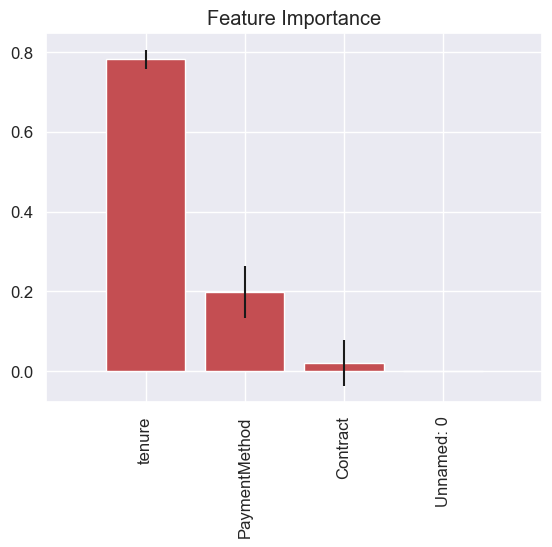

In [76]:
plot_feature_importances(rfc, feature_names=new_features1.columns, x_tick_rotation=90)

We oberve now tenure is the most important feature. But the accuracy of the model is reduced a lot so stopping here.
Considering this as a stop point, will not do any further reduction in features.

# Summary for advanced section

In this section we installed the h20 by correcting the java error (installed java in system) and futher initialised using init() method. Created a data frame using original data csv file with all the missing data. Checked on the performance usnig default parameters and then tried to tune the hyperparameters but performance is not improved though the change is observed in feature importances.
Also explored recursive method to reduce the features and checked on the remaining important features. We stopped at a point where performance decreased. So Contract looks like the most important feature for churn prediction.